# Employee Retention
There are always people starting new jobs and retiring, and some move between jobs. Talent retention is imperative for organizational success, therefore understanding employee behavior is key to sustaining a good economy.
Kaggle Employee dataset contains information about employees in a company, including their educational backgrounds, work history, demographics, and employment-related factors, which has been anonymized to protect privacy while still providing valuable insights into the workforce.

https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset/data

This dataset contains 8 features:
1. **Education**: Level of Education(Bachelors, Masters and PHD)
2. **Joining year**: The year of joining
3. **City**: To which city the employee belongs to
4. **PaymentTier**: Salary Tiers
5. **Age**: The age of the Employee
6. **Gender**: Male and Female
7. **EverBenched**: Everbenched (yes or no)
8. **experience in current domain**: Employee experience in terms of years

The target column is **Leave or Not** which is a binary column (0 or 1)


## Phase 1: Problem understanding

In the initial phase of our proposed data science project, our aim is to gain a deep understanding of the problem with the following objectives:
1. Analyze the distribution of each feature over leave or not.
2. Identify patterns in leave-taking behaviors.
3. Build a model to predict whether an employee will leave or not.

## Phase 2: Data preparation
In this stage, we will prepare the data to ensure it is clean, consistent, and free from errors for analysis exploring basic information about the dataset, and identifying outliers if present.


### Explore basic information about the dataset.

In [18]:
# Libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('.\data\Employee.csv')

df.info()

df.head(10)

df.describe()

print(df.shape)

for key in df.keys():
    print(key, df[key].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB
(4653, 9)
Education ['Bachelors' 'Masters' 'PHD']
JoiningYear [2017 2013 2014 2016 2015 2012 2018]
City ['Bangalore' 'Pune' 'New Delhi']
PaymentTier [3 1 2]
Age [34 28 38 27 24 22 23 37 32 39 29 30 36 31 25 26 40 35 33 41]
Gender ['Male'

Here, we can see different values for each column. Later, we will convert the categorical columns to numerical values. Also, we can see that there are no missing values in the dataset: 4653 entries for each column.

### Identify Outliers

In [19]:
# Check how many missing values are there in each column
print(df.isnull().sum())

# Check how many values are there in each column
print(df.apply(len))

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64
Education                    4653
JoiningYear                  4653
City                         4653
PaymentTier                  4653
Age                          4653
Gender                       4653
EverBenched                  4653
ExperienceInCurrentDomain    4653
LeaveOrNot                   4653
dtype: int64


## Phase 3: Exploratory data analysis

The goal in this stage is to gain preliminary insight into the data by utilizing graphical exploration. This stage is useful to uncover patterns and visualize relationships among variables. In this phase, we will:
1. **Explore Univariate Relationships over Leave or Not**: Identify relationships between predictors and the target variable “Leave or Not”
2. **Explore Multivariate Relationships**: Identify correlations between multiple attributes.


### Univariate Analysis Relationships over Leave or Not
First, we will explore the distribution of each column in the dataset based on the target column “Leave or Not” as a count, then as a percentage.

In [20]:
print(df['LeaveOrNot'].value_counts())

# print value counts in percentage
print(df['LeaveOrNot'].value_counts(normalize=True))


LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64
LeaveOrNot
0    0.656136
1    0.343864
Name: proportion, dtype: float64


F:\anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\anaconda\lib\site-package

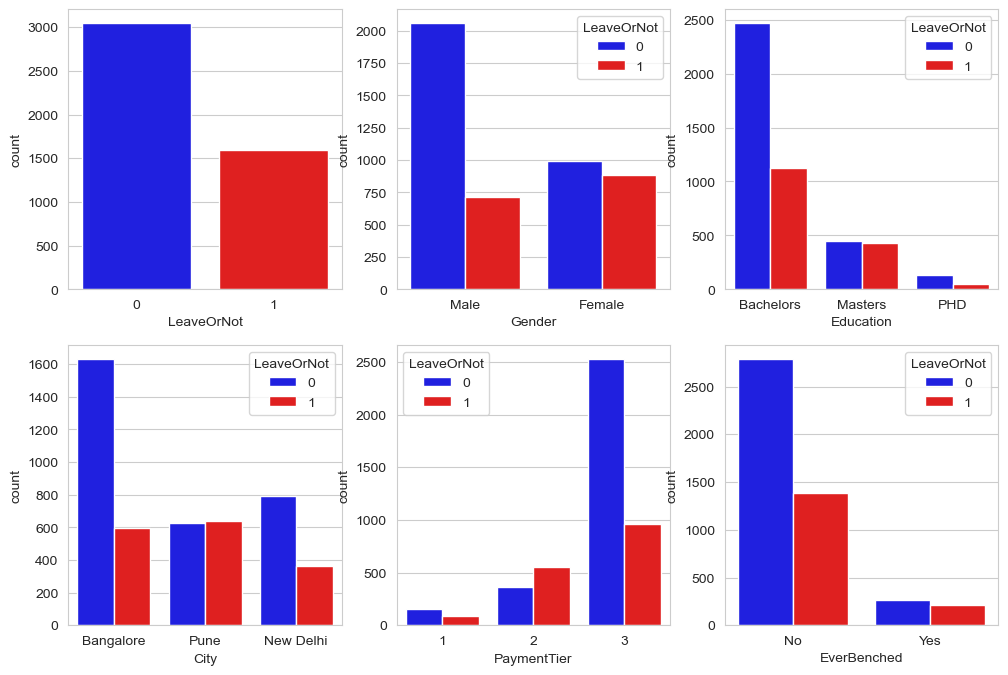

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = {1: 'red', 0: 'blue'}

# multiple subplots for LeaveOrNot, Education, City, PaymentTier, and Gender
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
sns.countplot(ax=axes[0, 0], x='LeaveOrNot', data=df, palette=palette)
sns.countplot(ax=axes[0, 1], hue="LeaveOrNot", x='Gender', data=df, palette=palette)
sns.countplot(ax=axes[0, 2], hue="LeaveOrNot", x='Education', data=df, palette=palette)
sns.countplot(ax=axes[1, 0], hue="LeaveOrNot", x='City', data=df, palette=palette)
sns.countplot(ax=axes[1, 1], hue="LeaveOrNot", x='PaymentTier', data=df, palette=palette)
sns.countplot(ax=axes[1, 2], hue="LeaveOrNot", x='EverBenched', data=df, palette=palette)

plt.show()

From the above plots, we can see that:
1. Females tend to leave more frequently
2. Employees with a bachelor’s degree tend to leave more frequently
3. Employees like to stay in Bangalore
4. Employees with higher salaries tend to leave less frequently
5. Employees who have been benched tend to leave more frequently and this will become clearer with the following plots.

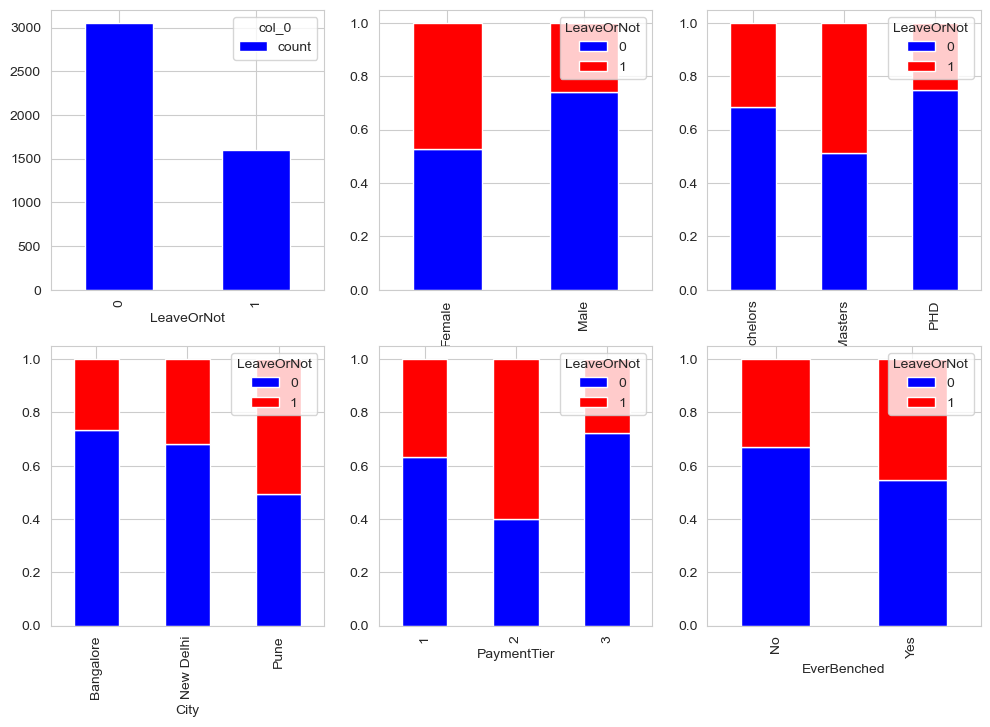

In [22]:
cross_tab_leave = pd.crosstab(index=df['LeaveOrNot'], columns='count')
cross_tab_gender = pd.crosstab(df['Gender'], df['LeaveOrNot'])
cross_tab_education = pd.crosstab(df['Education'], df['LeaveOrNot'])
cross_tab_city = pd.crosstab(df['City'], df['LeaveOrNot'])
cross_tab_payment_tier = pd.crosstab(df['PaymentTier'], df['LeaveOrNot'])
cross_tab_ever_benched = pd.crosstab(df['EverBenched'], df['LeaveOrNot'])

cross_tab_gender = cross_tab_gender.div(cross_tab_gender.sum(1), axis=0)
cross_tab_education = cross_tab_education.div(cross_tab_education.sum(1), axis=0)
cross_tab_city = cross_tab_city.div(cross_tab_city.sum(1), axis=0)
cross_tab_payment_tier = cross_tab_payment_tier.div(cross_tab_payment_tier.sum(1), axis=0)
cross_tab_ever_benched = cross_tab_ever_benched.div(cross_tab_ever_benched.sum(1), axis=0)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
cross_tab_leave.plot(ax=axes[0, 0],kind='bar', stacked=True, color=['blue', 'red'])
cross_tab_gender.plot(ax=axes[0, 1],kind='bar', stacked=True, color=['blue', 'red'])
cross_tab_education.plot(ax=axes[0, 2],kind='bar', stacked=True, color=['blue', 'red'])
cross_tab_city.plot(ax=axes[1, 0],kind='bar', stacked=True, color=['blue', 'red'])
cross_tab_payment_tier.plot(ax=axes[1, 1],kind='bar', stacked=True, color=['blue', 'red'])
cross_tab_ever_benched.plot(ax=axes[1, 2],kind='bar', stacked=True, color=['blue', 'red'])

plt.show()

From the above plots, we can see that:
1. Females tend to leave more frequently
2. Employees with a master’s degree leave the most, then bachelor’s degree, then PHD.
3. Employees like to stay in Bangalore, then New Delhi, then Pune.
4. Employees in the middle tier tend to leave more frequently, probably looking for even better jobs or that that market is more competitive.
5. Employees who have been benched tend to leave more frequently.

F:\anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\anaconda\lib\site-package

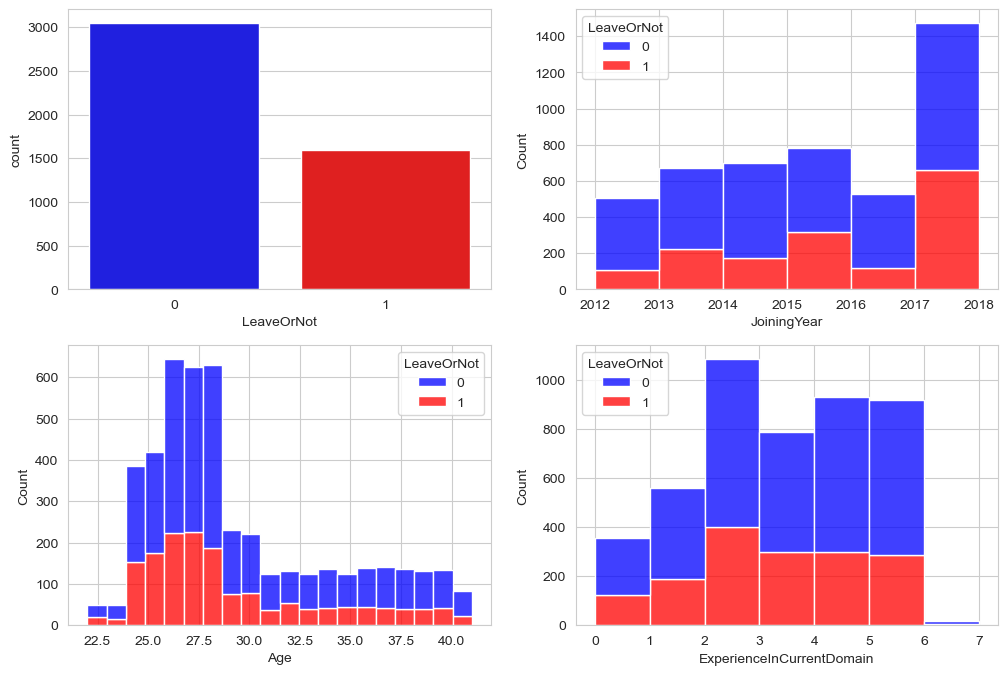

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# multiple subplots for JoiningYear, Age, and ExperienceInCurrentDomain
fig2, axes2 = plt.subplots(2, 2, figsize=(12, 8))
sns.countplot(ax=axes2[0, 0], x='LeaveOrNot', data=df, palette=palette)
sns.histplot(ax=axes2[0, 1], hue='LeaveOrNot', x='JoiningYear', data=df, bins=6, palette=palette, multiple='stack')
sns.histplot(ax=axes2[1, 0], hue='LeaveOrNot', x='Age', data=df, bins=20, palette=palette, multiple='stack')
sns.histplot(ax=axes2[1, 1], hue='LeaveOrNot', x='ExperienceInCurrentDomain', data=df, bins=7, palette=palette, multiple='stack')

plt.show()

From the above plots, we can see that:
1. There are more eployees with less years of experience except for the year 2016.
2. There are more employees with less age except for the age 30.
3. Most empoyees in the dataset have 2 to 6 years of experience.

F:\anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\anaconda\lib\site-package

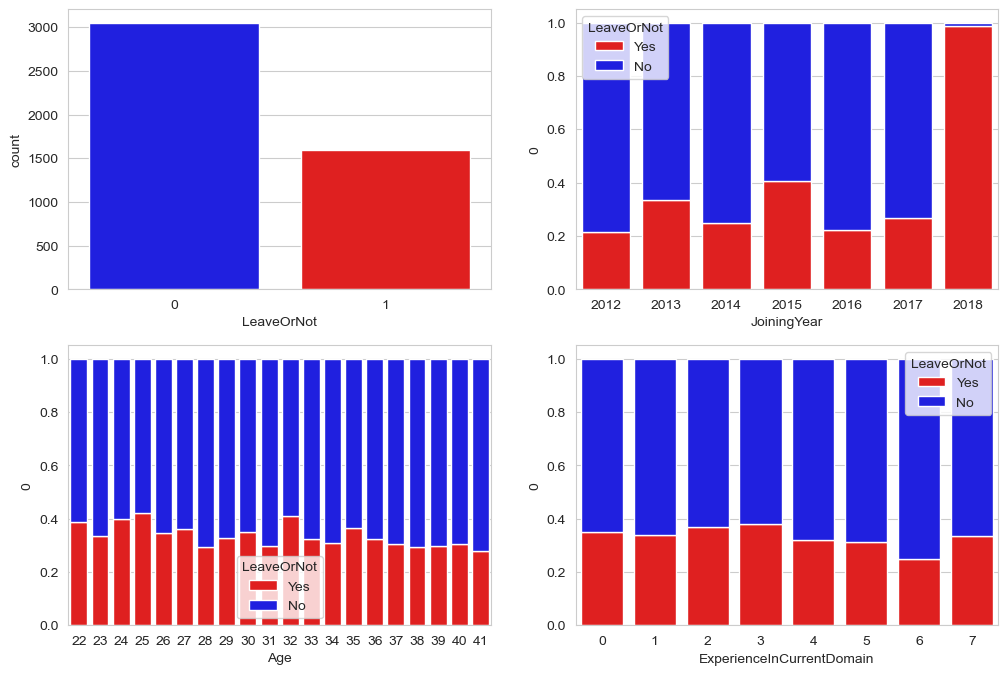

In [24]:


fig2, axes2 = plt.subplots(2, 2, figsize=(12, 8))

# Countplot for LeaveOrNot
sns.countplot(ax=axes2[0, 0], x='LeaveOrNot', data=df, palette=palette)

# Cross-tabulation and stacked bar plot for JoiningYear
joining_year_cross = pd.crosstab(df['JoiningYear'], df['LeaveOrNot'])
joining_year_cross = joining_year_cross.div(joining_year_cross.sum(1), axis=0)
sns.barplot(ax=axes2[0, 1], x=joining_year_cross.index, y=joining_year_cross[1], color=palette[1], label='Yes', data=joining_year_cross)
sns.barplot(ax=axes2[0, 1], x=joining_year_cross.index, y=joining_year_cross[0], color=palette[0], label='No', bottom=joining_year_cross[1], data=joining_year_cross)
axes2[0, 1].legend(title='LeaveOrNot')

# Cross-tabulation and stacked bar plot for Age
age_cross = pd.crosstab(df['Age'], df['LeaveOrNot'])
age_cross = age_cross.div(age_cross.sum(1), axis=0)
sns.barplot(ax=axes2[1, 0], x=age_cross.index, y=age_cross[1], color=palette[1], label='Yes', data=age_cross)
sns.barplot(ax=axes2[1, 0], x=age_cross.index, y=age_cross[0], color=palette[0], label='No', bottom=age_cross[1], data=age_cross)
axes2[1, 0].legend(title='LeaveOrNot')

# Cross-tabulation and stacked bar plot for ExperienceInCurrentDomain
exp_cross = pd.crosstab(df['ExperienceInCurrentDomain'], df['LeaveOrNot'])
exp_cross = exp_cross.div(exp_cross.sum(1), axis=0)
sns.barplot(ax=axes2[1, 1], x=exp_cross.index, y=exp_cross[1], color=palette[1], label='Yes', data=exp_cross)
sns.barplot(ax=axes2[1, 1], x=exp_cross.index, y=exp_cross[0], color=palette[0], label='No', bottom=exp_cross[1], data=exp_cross)
axes2[1, 1].legend(title='LeaveOrNot')

plt.show()


From the above plots, we can see that:
1. Almost all employees who joined in 2018 left their jobs.
2. There isn't a big variation in leave taking behavior based on age, but younger employees tend to leave slightly more frequently.
3. The same can be said to the experience in current domain, but employees with 2 or 3 years of experience tend to leave the most.

### Multivariate Relationships

We will look at the correlation between the columns to see if there are any relationships between them. Before that, we have to transform the categorical columns to numerical values.

In [25]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

df_t = df.copy()

le=LabelEncoder()
df_t["Education"]= le.fit_transform(df_t["Education"])
df_t["City"]=le.fit_transform(df_t["City"])
df_t["Gender"]=le.fit_transform(df_t["Gender"])
df_t["EverBenched"]=le.fit_transform(df_t["EverBenched"])

for key in df_t.keys():
    print(key, df_t[key].unique())

Education [0 1 2]
JoiningYear [2017 2013 2014 2016 2015 2012 2018]
City [0 2 1]
PaymentTier [3 1 2]
Age [34 28 38 27 24 22 23 37 32 39 29 30 36 31 25 26 40 35 33 41]
Gender [1 0]
EverBenched [0 1]
ExperienceInCurrentDomain [0 3 2 5 1 4 7 6]
LeaveOrNot [0 1]


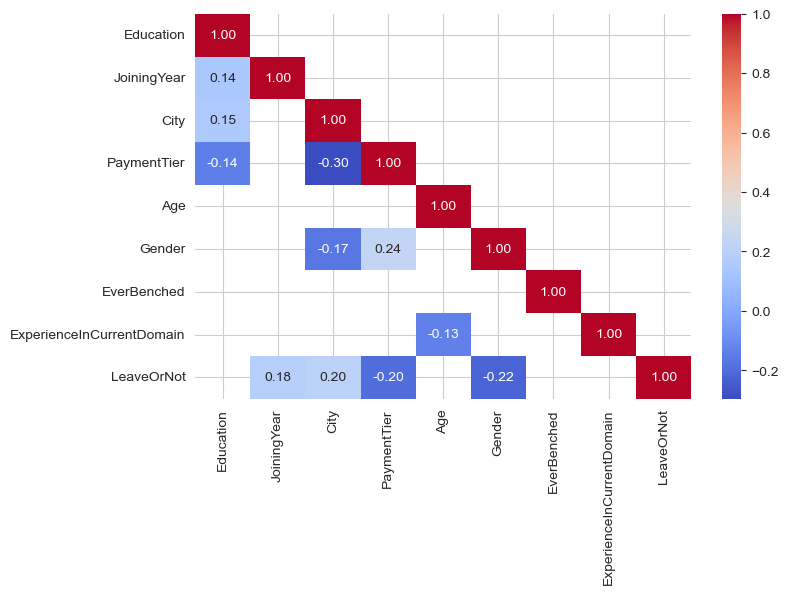

In [26]:
plt.figure(figsize=(8,5))
sns.heatmap(df_t.corr(), annot=True, fmt=".2f", cmap="coolwarm", mask=np.triu(df_t.corr().abs(), k=1) | (df_t.corr().abs() < 0.1))
plt.show()


From the above plot, we can see that there is no strong correlation between any two columns, even after removing any correlation less than 0.1. The remaining correlations are still weak, but most noticeable are PaymentTier and one of City or Gender, and LeaveOrNot with Gender.


## Phase 4: Setup

At this stage, we will have explored the data enough to understand the problem and the dataset, and we need to prepare it to be fed into the potential models by:
1. **Separating the data into train, validation, and test sets**
2. **Balancing the dataset using SMOTE**
3. **Establishing baseline model performance**

The baseline model is the simplest model that we can use to compare the performance of other models. In this case, we will use the most frequent class as the baseline model:
LeaveOrNot
0    0.656136
1    0.343864
Hence, the baseline model will predict 0 for all entries, and the accuracy will be 0.656136.

We will split the dataset into train, validation, and test sets with a ratio of 70%, 15%, and 15% respectively. Then, we will balance only the training set using SMOTE to ensure that the model is not biased towards the majority class. Finally, we will compare the performances of different models to the baseline model.

In [27]:
from sklearn.model_selection import train_test_split

# splitting the dataset into train and test sets
x_train, x_combined, y_train, y_combined = train_test_split(df_t.drop(['LeaveOrNot'], axis=1),
                                                    df_t['LeaveOrNot'],
                                                    random_state=42,
                                                    test_size=0.3,
                                                    stratify=df_t['LeaveOrNot'])

x_test, x_val, y_test, y_val = train_test_split(x_combined,
                                                y_combined,
                                                random_state=42,
                                                test_size=0.5,
                                                stratify=y_combined)

x_train_val = pd.concat([x_train, x_val])
y_train_val = pd.concat([y_train, y_val])

# Print the shapes
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)
print(x_train_val.shape, y_train_val.shape, '\n')

# Print the shapes divided by the total number of entries, rounded to 2 decimal places
print(round(x_train.shape[0]/df_t.shape[0], 2), round(y_train.shape[0]/df_t.shape[0], 2))
print(round(x_test.shape[0]/df_t.shape[0], 2), round(y_test.shape[0]/df_t.shape[0], 2))
print(round(x_val.shape[0]/df_t.shape[0], 2), round(y_val.shape[0]/df_t.shape[0], 2))
print(round(x_train_val.shape[0]/df_t.shape[0], 2), round(y_train_val.shape[0]/df_t.shape[0], 2))


(3257, 8) (3257,)
(698, 8) (698,)
(698, 8) (698,)
(3955, 8) (3955,) 

0.7 0.7
0.15 0.15
0.15 0.15
0.85 0.85


In [28]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(sampling_strategy="minority", random_state=42)
x_train_smote, y_train_smote= sm.fit_resample(x_train, y_train)

x_train_smote.shape, y_train_smote.shape

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (F:\anaconda\lib\site-packages\sklearn\utils\metaestimators.py)

## Phase 5: Modeling

Now the dataset is set and ready, we will feed it to different algorithms/models to uncover the relationships between the columns and target. In this phase, we need to:
1. **Implement three algorithms/models**: At least three classification models
2. **Train the models on training set and validate using validation set**: to achieve the best possible scores for the classification
3. **Train the best model on training and validation sets combined, and validate on test set**: to ensure the model is not overfitting


In [ ]:
accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]


### Random Forest Classifier

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, \
    ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

hyper_params = {"max_features": [1, 3, 8],
                "min_samples_split":[2, 3, 10],
                "min_samples_leaf":[1, 3, 10],
                "n_estimators":[100, 300, 400, 500],
                "criterion":["gini"]}

model = GridSearchCV(rf, hyper_params, cv=5, scoring="f1_macro", n_jobs=-1)
model.fit(x_train_smote, y_train_smote)
y_pred = model.predict(x_val)
print(model.best_estimator_)

print("----------------------")

accuracy_scores.append(accuracy_score(y_pred, y_val))
f1_scores.append(f1_score(y_pred, y_val))
precision_scores.append(precision_score(y_pred, y_val))
recall_scores.append(recall_score(y_pred, y_val))

# Print the Results
print(f"Accuracy:{accuracy_scores[-1]}")
print(f"F1-Score:{f1_scores[-1]}")
print(f"Precision:{precision_scores[-1]}")
print(f"Recall:{recall_scores[-1]}")

print("-------------------------------")
print("Classifiaction Report")
print("-------------------------------")
print(classification_report(y_val, y_pred, digits=3))
print("Confusion_Matrix")
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, cmap="Reds")
plt.show()

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_param_grid = {
    "learning_rate": [0.05, 0.1, 0.02],
    "n_estimators": [100,200,300,400,500],
    "min_samples_split": [2,3,10],
    "min_samples_leaf": [1,3,10]
}

gbc = GradientBoostingClassifier()
gbc_model = GridSearchCV(gbc, gbc_param_grid, cv=5, scoring="f1_macro", n_jobs=-1 )
gbc_model.fit(x_train_smote, y_train_smote)
y_pred = gbc_model.predict(x_val)
print(gbc_model.best_estimator_)

accuracy_scores.append(accuracy_score(y_pred, y_val))
f1_scores.append(f1_score(y_pred, y_val))
precision_scores.append(precision_score(y_pred, y_val))
recall_scores.append(recall_score(y_pred, y_val))

# Print the Results
print(f"Accuracy:{accuracy_scores[-1]}")
print(f"F1-Score:{f1_scores[-1]}")
print(f"Precision:{precision_scores[-1]}")
print(f"Recall:{recall_scores[-1]}")

print("-------------------------------")
print("Classifiaction Reoprt")
print("-------------------------------")
print(classification_report(y_val, y_pred,digits=3))
print("Confusion_Matrix")
ConfusionMatrixDisplay.from_predictions(y_val, y_pred,cmap="Greens")
plt.show()


### Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

gbc=GradientBoostingClassifier()
gbc1=GradientBoostingClassifier(learning_rate=0.05, min_samples_split=3,n_estimators=500)
rf=RandomForestClassifier(max_features=3, min_samples_leaf=3, min_samples_split=3)

voting_model = VotingClassifier(estimators=[('gradient_bosting1', gbc),('gradient_bosting2', gbc), ('gradient_bosting3', gbc), ('gradient_bosting4',gbc),('gradient_bosting5',gbc)], voting='hard', n_jobs=-1)
voting_model.fit(x_train_smote, y_train_smote)
y_pred = voting_model.predict(x_val)

accuracy_scores.append(accuracy_score(y_pred, y_val))
f1_scores.append(f1_score(y_pred, y_val))
precision_scores.append(precision_score(y_pred, y_val))
recall_scores.append(recall_score(y_pred, y_val))

# Print the Results
print(f"Accuracy:{accuracy_scores[-1]}")
print(f"F1-Score:{f1_scores[-1]}")
print(f"Precision:{precision_scores[-1]}")
print(f"Recall:{recall_scores[-1]}")

print("-------------------------------")
print("Classifiaction Reoprt")
print("-------------------------------")
print(classification_report(y_val, y_pred,digits=3))
print("Confusion_Matrix")
ConfusionMatrixDisplay.from_predictions(y_val, y_pred,cmap="Purples")
plt.show()


In [ ]:
# Print the Results rounded to 3 decimal places for each model

print("Random Forest Classifier")
print(f"Accuracy:{round(accuracy_scores[0], 3)}", f"F1-Score:{round(f1_scores[0], 3)}", f"Precision:{round(precision_scores[0], 3)}", f"Recall:{round(recall_scores[0], 3)}")

print("Gradient Boosting Classifier")
print(f"Accuracy:{round(accuracy_scores[1], 3)}", f"F1-Score:{round(f1_scores[1], 3)}", f"Precision:{round(precision_scores[1], 3)}", f"Recall:{round(recall_scores[1], 3)}")

print("Voting Classifier")
print(f"Accuracy:{round(accuracy_scores[2], 3)}", f"F1-Score:{round(f1_scores[2], 3)}", f"Precision:{round(precision_scores[2], 3)}", f"Recall:{round(recall_scores[2], 3)}")


### Model selection
from the above results, we can see that the best f1-score is for the voting classifier, so we will choose it as our best model.

## Phase 6: Evaluation

In this phase, the testing portion will be trained on the training and validation sets combined, and then evaluated on the test set. The goal is to ensure that the model is not overfitting and that it can generalize well to unseen data.


In [ ]:
# Train the best model on training and validation sets combined, and validate on test set
voting_model.fit(x_train_val, y_train_val)
y_pred = voting_model.predict(x_test)

accuracy_scores.append(accuracy_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))

# Print the Results
print(f"Accuracy:{accuracy_scores[-1]}")
print(f"F1-Score:{f1_scores[-1]}")
print(f"Precision:{precision_scores[-1]}")
print(f"Recall:{recall_scores[-1]}")

print("-------------------------------")
print("Classifiaction Reoprt")
print("-------------------------------")
print(classification_report(y_test, y_pred,digits=3))
print("Confusion_Matrix")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="Oranges")
plt.show()



## Phase 7: Deployment

Here's the best model in a pickle file for your burgers and fries.

In [ ]:
# Save the model
import pickle

pickle.dump(voting_model, open('model.pkl', 'wb'))

# Save the scaler
pickle.dump(le, open('le.pkl', 'wb'))
